In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:title={'center':'Frequency Purchased'}>

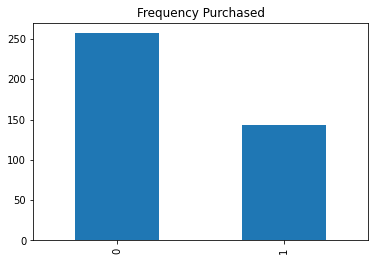

In [7]:
df["Purchased"].value_counts().plot(kind="bar", title="Frequency Purchased")

In [8]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Gender"] = LE.fit_transform(df["Gender"])

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = RF.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [ 2, 30]])

In [19]:
accuracy_score(y_test, y_pred)*100

94.0